In [21]:
import numpy as np
import k3d
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt
from utils import get_data_configs, get_path_configs, get_train_configs
from utils.dataset_utils import (
    create_hbw_csv,
    get_datasets,
    get_dataloader,
    build_transforms,
)
from train import train_model
import torch

os.chdir("c:\\Users\\nikhi\\Documents\\Projects\\Human_Body_Shape_Estimation")

def render_3d_mesh_plotly(smplx_vertices):
    """
    Render a 3D mesh from vertices using plotly.

    Parameters:
    - vertices: NumPy array of shape (N, 3), where N is the number of vertices.

    Returns:
    - None (opens the 3D interactive plot in a browser).
    """
    fig = go.Figure(data=[go.Scatter3d(x=smplx_vertices[:, 0], y=smplx_vertices[:, 1], z=smplx_vertices[:, 2],
                                     mode='markers', marker=dict(size=2))])

    fig.update_layout(scene=dict(aspectmode='data'))
    fig.show()



def render_smooth_3d_mesh(vertices):
    """
    Render a smooth 3D mesh from vertices using k3d.

    Parameters:
    - vertices: NumPy array of shape (N, 3), where N is the number of vertices.

    Returns:
    - plot: k3d Plot object.
    """
    plot = k3d.plot()

    # Reduce point size, set light blue color, and adjust opacity for smoother appearance
    points = k3d.points(vertices.astype(np.float32), point_size=0.02, shader='3dSpecular', color=0xADD8E6, opacity=0.8)


    # Add the points to the plot
    plot += points

    # Set camera position and orientation for better view
    plot.camera = [1.5, 1.5, 1.5, 0, 0, 0, 0, 1, 0]

    return plot

def visualize_image(img):
    # imgs = make_grid(imgs)
    img = img.cpu().numpy()
    mean = np.array((0.485, 0.456, 0.406)).reshape((3, 1, 1))
    std = np.array((0.229, 0.224, 0.225)).reshape((3, 1, 1))
    img = (img * std + mean).transpose(1, 2, 0)
    plt.imshow(img)
    plt.show()




In [6]:
vertex = np.load("C:\\Users\\nikhi\\Documents\\Projects\\Human_Body_Shape_Estimation\\data\\HBW\\smplx\\val\\033.npy")

# render_3d_mesh_plotly(vertex)
plot = render_smooth_3d_mesh(vertex)
plot.display()


Output()

In [14]:
path_cfg = get_path_configs()
path_cfg.checkpoint_file = "img2smplx_2023-12-01_11-9-39.ckpt"
data_cfg = get_data_configs()
train_cfg = get_train_configs()

_ = create_hbw_csv(
    path_cfg.yaml_file, path_cfg.images_dir, path_cfg.smplx_gts, path_cfg.csv_file
)
transform = build_transforms()
trainset, testset = get_datasets(path_cfg.csv_file, transform, test_size=0.1)
trainloader, valloader = get_dataloader(
    trainset, train_cfg.batch_size, type="train", val_size=0.2
)
testloader = get_dataloader(testset, train_cfg.batch_size, type="test")


model, result = train_model(
        path_cfg,
        data_cfg,
        train_cfg,
        trainloader,
        valloader,
        testloader,
        True,
        "test",
        None,
    )


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Found saved model checkpoint at model_ckpts\img2smplx_2023-12-01_11-9-39.ckpt, loading...


c:\Users\nikhi\Documents\Projects\Human_Body_Shape_Estimation\.venv\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning:

Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.

Missing logger folder: model_ckpts\lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\nikhi\Documents\Projects\Human_Body_Shape_Estimation\.venv\Lib\site-packages\pytorch_lightning\loggers\tensorboard.py:187: Could not log computational graph to TensorBoard: The `model.example_input_array` attribute is not set or `input_array` was not given.
c:\Users\nikhi\Documents\Projects\Human_Body_Shape_Estimation\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Validation: |          | 0/? [00:00<?, ?it/s]

c:\Users\nikhi\Documents\Projects\Human_Body_Shape_Estimation\.venv\Lib\site-packages\pytorch_lightning\utilities\data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss             2.478320837020874
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


c:\Users\nikhi\Documents\Projects\Human_Body_Shape_Estimation\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss            2.638824462890625
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [17]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([8, 10475, 3]) torch.Size([8, 10475, 3])


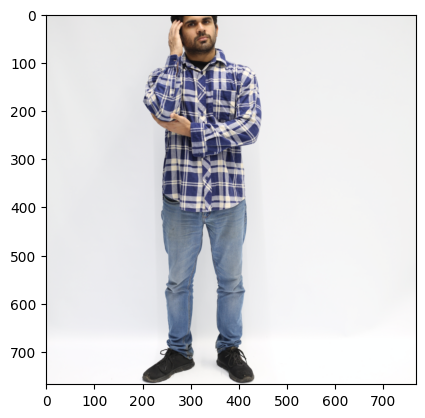

In [33]:
batch = next(iter(testloader))

# Modify index variable [0-7] to look at various examples
idx=4

X, verts = batch["X"], batch["y"]
imgs, genders = X

imgs, verts = imgs.to(device), verts.to(device)
model = model.to(device)
preds = model(imgs, genders)

print(verts.shape, preds.shape)

visualize_image(imgs[idx].detach())


In [31]:
print("Ground Truth:")
plot = render_smooth_3d_mesh(verts[idx].detach().cpu().numpy())
plot.display()

Ground Truth:


Output()

In [32]:
print("Prediction:")
plot = render_smooth_3d_mesh(preds[idx].detach().cpu().numpy())
plot.display()

Prediction:


Output()